# Computer Vision Libraries in Pytorch

1. torchvision - base domain library for Pytorch computer Vision
2. torchvision.datasets - get datasets and data loading functions for computer vision here
3. torchvision.models - get pretrained computer vision models that we can leverage for our problems
4. torchvision.transforms - functions for manipulating the vision data into suitable usable format for ML models
5. torch.utils.data.Dataset - Base Dataset class for Pytorch
6. torch.utils.data.DataLoader - Creates a Pytorch iterable over Dataset

In [179]:
## Importing required Libraries

import torch
from torch import nn

# Importing torchvision and other libraries
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

In [180]:
import matplotlib.pyplot as plt

In [181]:
## setup training data and Test data

train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform = None # how do we want to transform the target labels
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

In [182]:
print(train_data.data.shape), print(train_data.targets.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


(None, None)

In [183]:
len(train_data), len(test_data)

(60000, 10000)

In [184]:
image, label = train_data[0]

In [185]:
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [186]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [187]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [188]:
cls_to_index = train_data.class_to_idx
cls_to_index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [189]:
# Checking the shape of the image
print(f"Image Shape: {image.shape} -->  [color_channels, height, width]")
print(f"Image Label: {class_names[label]}")

Image Shape: torch.Size([1, 28, 28]) -->  [color_channels, height, width]
Image Label: Ankle boot


## Visualize Data

Image Shape: torch.Size([1, 28, 28])


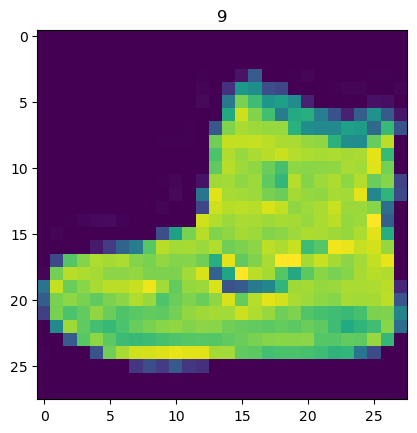

In [190]:
image, label = train_data[0]
print(f"Image Shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);

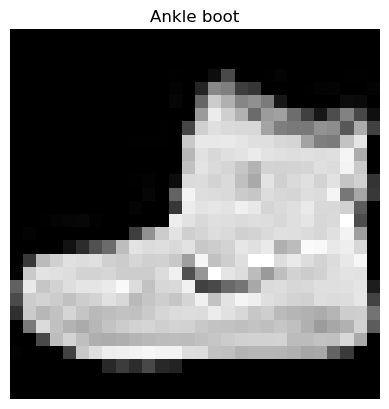

In [191]:
plt.imshow(image.squeeze(), cmap = "grey")
plt.title(class_names[label])
plt.axis(False);

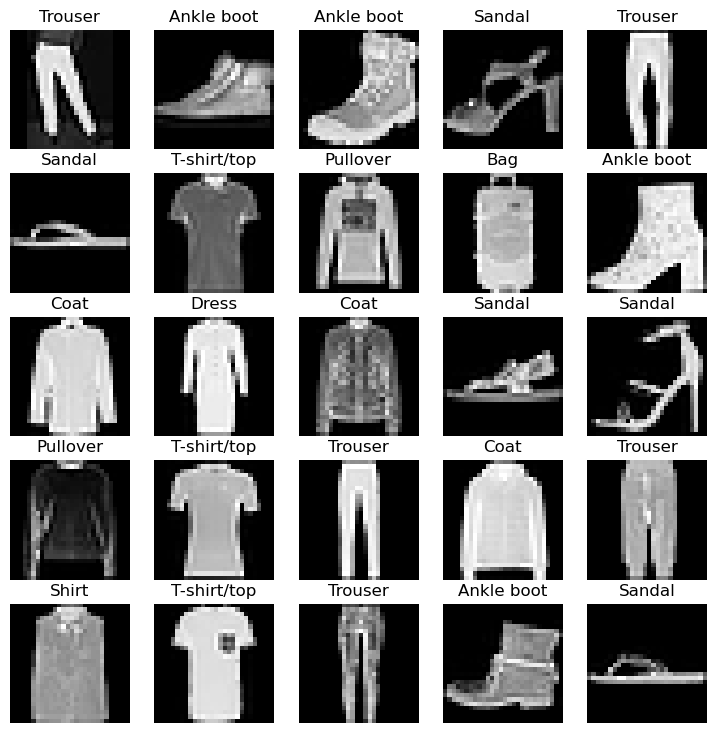

In [192]:
# plot more images
torch.manual_seed(95)
fig = plt.figure(figsize = (9,9))
rows, cols = 5,5
for i in range(1, rows*cols+1):
    random_index_num = torch.randint(0, len(train_data), size = [1]).item()
    image, label = train_data[random_index_num]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap = "grey")
    plt.title(class_names[label])
    plt.axis(False)

## 2. Prepare DataLoader

Right now our data is in the form of Pytorch Dataset Format.

DataLoader turns the dataset into a Python iterable.

More specifically, we want to convert our dataset into batches.

1. We convert into batches because it is more computaionally efficient.
2. If we are breaking the data into batches, batch size of 32, we pass 32 images at once and then, our model gets more chances to update its gradients per epoch. So for 1 epoch we are passing the whole data in batches of 32 images per batch.

In [193]:
from torch.utils.data import DataLoader

In [194]:
# Define the Batch Size
BATCH_SIZE = 40

# Turn datasets into Python Iterbale batches
train_dataloader = DataLoader(dataset = train_data,
                             batch_size= BATCH_SIZE,
                             shuffle = True,
                             drop_last= True)

test_dataloader = DataLoader(dataset = test_data,
                            batch_size = BATCH_SIZE,
                            shuffle = False,
                            drop_last = True)

In [195]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x165527750>,
 <torch.utils.data.dataloader.DataLoader at 0x1650ffd10>)

In [196]:
# Checking the length and the number of batches of train and test dataloaders
print(f"DataLoaders we created are: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader : {len(train_dataloader)} and the batches created are : {BATCH_SIZE}")
print(f"Length of test_dataloader : {len(test_dataloader)} and the batches created are : {BATCH_SIZE}")

DataLoaders we created are: (<torch.utils.data.dataloader.DataLoader object at 0x165527750>, <torch.utils.data.dataloader.DataLoader object at 0x1650ffd10>)
Length of train_dataloader : 1500 and the batches created are : 40
Length of test_dataloader : 250 and the batches created are : 40


In [197]:
# To check what is inside the traning dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

In [198]:
train_features_batch.shape, train_labels_batch.shape

(torch.Size([40, 1, 28, 28]), torch.Size([40]))

Image size: torch.Size([1, 28, 28])
Label: 9, label size: torch.Size([])


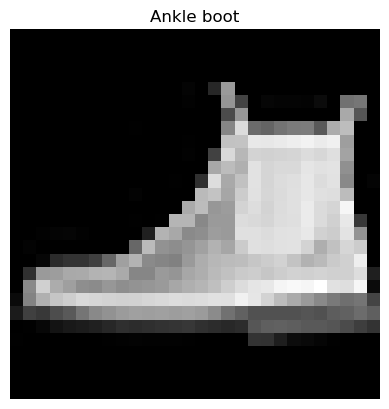

In [199]:
# Checking one sample
torch.manual_seed(55)
random_index = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_index], train_labels_batch[random_index]
plt.imshow(img.squeeze(), cmap = "grey")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {image.shape}")
print(f"Label: {label}, label size: {label.shape}")

### 3. Build a Baseline Model
Its always good to start with a baseline model and add complexity when necessary

In [200]:
# create a flatten layer
flatten_layer = nn.Flatten()

# Get a single sample input and pass it through flatten layer and lets see whats happening
x = train_features_batch[0]

output = flatten_layer(x)

print(f"The shape of the input befor passing it through flatten layer is : {x.shape}")
print(f"The shape after passing through flatten layer is : {output.shape}")

The shape of the input befor passing it through flatten layer is : torch.Size([1, 28, 28])
The shape after passing through flatten layer is : torch.Size([1, 784])


In [201]:
# creating a simple model to pass input
class FashionMnistModel_0(nn.Module):
    def __init__(self,
                input_shape:int,
                output_shape:int,
                hidden_units:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                     out_features = hidden_units),
            nn.Linear(in_features= hidden_units,
                     out_features = hidden_units),
            nn.Linear(in_features = hidden_units,
                     out_features= output_shape)
        )
    def forward(self, x):
        return self.layer_stack(x)

In [202]:
torch.manual_seed(95)

# setup the model with input params
model_0 = FashionMnistModel_0(
    input_shape= 784,
    hidden_units= 10,
    output_shape = len(class_names)
)

model_0.to('cpu')

FashionMnistModel_0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [203]:
# lets create one small dummy variable and then pass it through the model
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.1634, -0.3384, -0.1700, -0.1236,  0.2200, -0.1807,  0.2039,  0.2622,
         -0.2174, -0.1326]], grad_fn=<AddmmBackward0>)

In the above error as wwe could see, if we are just passing the input shape same as the height or width of the dimension, it throughs error saying shape mismatch. BECAUSE --->

in the sequential layer ->
1. first we are putting the flatten layer where if the input is 1,28,28 -> it will be reduced to 1, 784.
2. now the output of the flatten layer is 1, 784
3. so now we need to prepare the input layer to expect 784 shape as input so thats why we need to put the shape of the input layer as 784

In [204]:
torch.manual_seed(95)

# setup the model with input params
model_1 = FashionMnistModel_0(
    input_shape= 784,
    hidden_units= 10,
    output_shape = len(class_names)
)

model_1.to('cpu')

FashionMnistModel_0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [205]:
# lets create one small dummy variable and then pass it through the model
dummy_x = torch.rand([1, 1, 28, 28])
model_1(dummy_x)

tensor([[-0.1634, -0.3384, -0.1700, -0.1236,  0.2200, -0.1807,  0.2039,  0.2622,
         -0.2174, -0.1326]], grad_fn=<AddmmBackward0>)

In [206]:
model_1(dummy_x).shape

torch.Size([1, 10])

In [207]:
model_1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0053, -0.0256,  0.0226,  ...,  0.0189,  0.0097,  0.0334],
                      [-0.0267,  0.0280, -0.0157,  ..., -0.0237,  0.0244, -0.0265],
                      [-0.0158,  0.0021, -0.0031,  ...,  0.0161,  0.0068, -0.0267],
                      ...,
                      [-0.0262, -0.0077, -0.0260,  ...,  0.0144,  0.0076,  0.0259],
                      [-0.0210,  0.0267,  0.0302,  ...,  0.0317, -0.0261, -0.0154],
                      [-0.0186,  0.0300, -0.0088,  ...,  0.0076,  0.0292, -0.0281]])),
             ('layer_stack.1.bias',
              tensor([-0.0148, -0.0291, -0.0349, -0.0145, -0.0267,  0.0196,  0.0100,  0.0136,
                      -0.0105,  0.0242])),
             ('layer_stack.2.weight',
              tensor([[-0.2680,  0.2473, -0.1974, -0.0940, -0.1504, -0.2786,  0.2889, -0.1833,
                       -0.2029,  0.1124],
                      [ 0.0673, -0.2906,  0.0084,  0.2285,  0.1518,  0.1005, -0.

## 3.1 Setup Loss, Optimizer and EValuation Metric
1. As we are working with multiclass data, our loss will be CrossEntropyLoss
2. We can use SGD or Adam or other optimizers
3. We can use accuracy or other evaluation metrics like confusion matrix and classification report

In [208]:
# importing Helper Function

import requests
from pathlib import Path

if Path("helper_functions.py").is_file:
    print("Skipping download...")
else:
    print("Downloading helper functions file")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

Skipping download...


In [209]:
pip install torchmetrics

Note: you may need to restart the kernel to use updated packages.


In [210]:
# Importing accuracy metric
from helper_functions import accuracy_fn
# alternatively we can also import from torch metrics

# setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                           lr = 0.01)

### Creating a Timer Function to time the model runtime

In [211]:
from timeit import default_timer as timer

#creating a timer function for timing the model run time

def start_end_timer_tracker(start: float,
                           end: float,
                           device: torch.device = None):
    """Prints the total runtime took to run the code"""

    runtime = end-start
    print(f"Train time on device : {device} is {runtime:.4f} sec")
    return runtime

In [212]:
start = timer()

print("hello world")

end = timer()

start_end_timer_tracker(start = start,
                       end = end,
                       device = "cpu")

hello world
Train time on device : cpu is 0.0001 sec


9.526894427835941e-05

##### Remember - The Optimizer will update the model's params once per batch rather than once per epoch

Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

In [213]:
from torch.utils.data import DataLoader

In [214]:
# creating dataloader once again

BATCH_SIZE = 40

# DataLoader helps us to iterate over the dataset so that we can loop the dataset in batches over the model
train_dataloader = DataLoader(dataset = train_data,
                             batch_size= BATCH_SIZE,
                             shuffle = True,
                             drop_last= True)

test_dataloader = DataLoader(dataset = test_data,
                            batch_size = BATCH_SIZE,
                            shuffle = True,
                            drop_last = True)


In [215]:
# Checking the contents of the dataloaders created

print(f"DataLoaders created are : {train_dataloader}, {test_dataloader}")
print(f"Length of train dataloader is : {len(train_dataloader)} with batches : {BATCH_SIZE}")
print(f"Length of test dataloader is : {len(test_dataloader)} with batches : {BATCH_SIZE}")

DataLoaders created are : <torch.utils.data.dataloader.DataLoader object at 0x1658bad10>, <torch.utils.data.dataloader.DataLoader object at 0x16589d2d0>
Length of train dataloader is : 1500 with batches : 40
Length of test dataloader is : 250 with batches : 40


In [216]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([40, 1, 28, 28]), torch.Size([40]))

Image size: torch.Size([1, 28, 28])
Label: 9, Label Shape: torch.Size([])


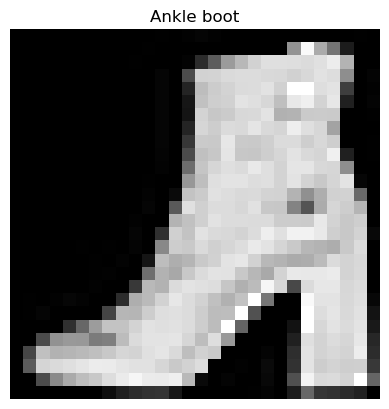

In [217]:
# Checking a sample from the train features batch
random_index = torch.randint(0, len(train_features_batch), size = [1]).item()
image, label = train_features_batch[random_index], train_labels_batch[random_index]
plt.imshow(image.squeeze(), cmap = "grey")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {image.shape}")
print(f"Label: {label}, Label Shape: {label.shape}")

### Creating a train loop and training a model on batches of data created using DataLoader

1. Give number of epochs -> how many times the model should go through the training batches
2. For every epoch, the model will go through all the batches and claculate the training loss. The training loss will be calculated for every batch over one epoch
3. For every epoch -> Loop through test batches, testing loss will be calculated for every batch over one epoch
4. print out whats heppening
5. Time it

In [218]:
pip install jupyterlab-indent-guides

Note: you may need to restart the kernel to use updated packages.


In [219]:
from tqdm.notebook import tqdm

In [220]:
# Importing tqdm for progress bar

# setting random seed and initiating timer functionality to track the timer
torch.manual_seed(95)
train_start_timer = timer()

# set the number of epochs. Lets start with smaller number of epochs and build up slowly
epochs = 50

# Creating training and testing loop for epochs
for epoch in tqdm(range(epochs)):
    print(f"The current epoch is : {epoch} \n-------")

    # Initializing the train loss to 0
    train_loss = 0

    # Adding another loop to through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        #1. Put the model in training mode
        model_1.train()

        #2. Do the forward pass
        y_pred = model_1.forward(X)

        #3. Calculate the accumulated loss as we are passing the data in batches
        loss = loss_fn(y_pred, y)
        train_loss += loss

        #4. Optimizer zero gard which sets the gradients to zero
        optimizer.zero_grad()

        #5. Loss Backward
        loss.backward()

        #6. Optimizer Step - This will update the model's params
        optimizer.step()

        #7. Print out whats happening - 
        if batch % 500 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # after every epoch, the train loss will be accumulated by with previous epoch train loss, so we need to average it with len of samples
    train_loss /= len(train_dataloader)

    # Testing
    # Put the model in eval mode
    model_1.eval()
    test_loss = 0
    test_acc = 0
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_1.forward(X_test) # this return logits as output
            test_loss += loss_fn(test_pred, y_test) 
            test_acc += accuracy_fn(y_test, test_pred.argmax(dim = 1)) # as we should pass the labels, from logits we are doing argmax and extracting the highest arg

    # after every epoch, the train loss will be accumulated by with previous epoch train loss, so we need to average it with len of samples
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"Train Loss: {train_loss:.4f} ,  Test Loss: {test_loss:.4f} ,  Test Accuracy: {test_acc:.4f}")

# Calculate the training time
train_end_timer = timer()
start_end_timer_tracker(start = train_start_timer,
                       end = train_end_timer,
                       device = str(next(model_1.parameters()).device))

  0%|          | 0/50 [00:00<?, ?it/s]

The current epoch is : 0 
-------
Looked at 0/60000 samples
Looked at 20000/60000 samples
Looked at 40000/60000 samples
Train Loss: 1.0759 ,  Test Loss: 0.7213 ,  Test Accuracy: 74.1300
The current epoch is : 1 
-------
Looked at 0/60000 samples
Looked at 20000/60000 samples
Looked at 40000/60000 samples
Train Loss: 0.6187 ,  Test Loss: 0.5834 ,  Test Accuracy: 79.0100
The current epoch is : 2 
-------
Looked at 0/60000 samples
Looked at 20000/60000 samples
Looked at 40000/60000 samples
Train Loss: 0.5405 ,  Test Loss: 0.5644 ,  Test Accuracy: 79.5400
The current epoch is : 3 
-------
Looked at 0/60000 samples
Looked at 20000/60000 samples
Looked at 40000/60000 samples
Train Loss: 0.5059 ,  Test Loss: 0.5156 ,  Test Accuracy: 81.7000
The current epoch is : 4 
-------
Looked at 0/60000 samples
Looked at 20000/60000 samples
Looked at 40000/60000 samples
Train Loss: 0.4840 ,  Test Loss: 0.5055 ,  Test Accuracy: 82.1300
The current epoch is : 5 
-------
Looked at 0/60000 samples
Looked at 

414.45943867194

### Creating Evaluation Function

In [221]:
torch.manual_seed(95)

def eval_model(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn):
    """Returns a dictionary containing the results of the model predicting on Data Loader"""

    loss, accuracy = 0, 0
    model.eval()
    with torch.inference_mode():
        
        for X, y in tqdm(data_loader):

            # Accumulating the Loss and Accuracy over batches
            y_preds = model.forward(X)
            loss += loss_fn(y_preds, y)
            accuracy += accuracy_fn(y_true = y,
                                  y_pred = y_preds.argmax(dim = 1))

            # Scaling the Loss and Accuracy
        loss /= len(data_loader)
        accuracy /= len(data_loader)

        return{"Model Name" : model.__class__.__name__,# only works when model is created using class
                "Model Loss" : loss.item(),
                "Model Accuracy" : accuracy}
            

In [222]:
model_1_results = eval_model(model=model_1,
                              data_loader=test_dataloader,
                              loss_fn = loss_fn,
                              accuracy_fn= accuracy_fn)

  0%|          | 0/250 [00:00<?, ?it/s]

In [223]:
model_1_results

{'Model Name': 'FashionMnistModel_0',
 'Model Loss': 0.4488147497177124,
 'Model Accuracy': 84.18}

In [224]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [225]:
device

'cpu'

## 6. Building a better model using Non-Linearity

In [226]:
# Create a model with Non Linearity

class FashionMNISTModel_NonLinear(nn.Module):
    def __init__(self,
                input_shape:int,
                output_shape:int,
                hidden_units:int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features= input_shape,
                     out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                     out_features=hidden_units),
            nn.ReLU(),
             nn.Linear(in_features= hidden_units,
                     out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                     out_features=output_shape),
        )

    def forward(self, x:torch.Tensor):
        return self.layer_stack(X)

In [227]:
model_2 = FashionMNISTModel_NonLinear(input_shape = 784,
                                     hidden_units = 50,
                                     output_shape = len(class_names)).to(device)

In [228]:
# Creating Loss and Accuracy functions and Optimizer

In [229]:
loss_fn = nn.CrossEntropyLoss() # Measures how wrong our model is
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                         lr = 0.001) # tries to update the model weights to reduce the loss

from helper_functions import accuracy_fn


### Functionalizing Training and Evaluation Loops

In [230]:
def train_step(accuracy_fn,
               data_loader:torch.utils.data.DataLoader,
               model:torch.nn.Module,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device = device
               ):
    """Performs Training Step on Model trying to learn from dataloader"""
    
    training_loss, training_acc = 0, 0
    #1. Put the model in training Loop
    model.train()

    for batch, (X,y) in enumerate(data_loader):
        # put data on the target device
        X, y = X.to(device), y.to(device)


        #2. Do the forward pass
        y_preds = model(X)

        #3. Calculate the Loss
        loss = loss_fn(y_preds, y)
        training_loss += loss

        training_acc += accuracy_fn(y, y_preds.argmax(dim = 1))

        #4. Optimizer Zero Grad
        optimizer.zero_grad()

        #5. Loss Backward
        loss.backward()

        #6. Optimizer Step
        optimizer.step()

    training_loss /= len(data_loader)
    training_acc /= len(data_loader)

    print(f"Training Loss :  {training_loss:.5f}  ,    Training Accuracy  :  {training_acc:.2f}%\n")
        

            

In [231]:
def test_step(accuracy_fn,
              model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              device:torch.device=device):
    
    """Performs Testing on the Evaluation Datset on the given Model"""
    testing_loss, testing_acc = 0, 0

    model.eval()
    with torch.inference_mode():


        for i, (X,y) in enumerate(data_loader):
            X,y = X.to(device), y.to(device)
        
            test_preds = model.forward(X)
            loss = loss_fn(test_preds, y)
            testing_loss += loss
            
            testing_acc = accuracy_fn(y, test_preds.argmax(dim = 1))
            
        testing_loss /= len(data_loader)
            
        testing_acc /= len(data_loader)

    print(f"Testing Loss :  {testing_loss:.4f}  ,  Testing Accuracy  :  {testing_acc:.2f}%\n")
            

In [232]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [233]:
from tqdm.notebook import tqdm

In [234]:
# Importing tqdm for progress bar

# setting random seed and initiating timer functionality to track the timer
torch.manual_seed(95)
timer_start = timer()

# set the number of epochs. Lets start with smaller number of epochs and build up slowly
epochs = 5

for epoch in tqdm(range(epochs)):

    print(f"The current epoch is {epoch+1}  \n---------")

    train_step(accuracy_fn,
               model = model_2,
               optimizer = optimizer,
               data_loader = train_dataloader,
               loss_fn = loss_fn)

    test_step(accuracy_fn,
              model = model_2,
              data_loader = test_dataloader,
              loss_fn = loss_fn)

timer_end = timer()

start_end_timer_tracker(start = timer_start,
                       end = timer_end,
                       device = str(next(model_2.parameters()).device))

    

  0%|          | 0/5 [00:00<?, ?it/s]

The current epoch is 1  
---------
Training Loss :  2.30451  ,    Training Accuracy  :  10.00%

Testing Loss :  2.3042  ,  Testing Accuracy  :  0.03%

The current epoch is 2  
---------
Training Loss :  2.30364  ,    Training Accuracy  :  10.10%

Testing Loss :  2.3032  ,  Testing Accuracy  :  0.03%

The current epoch is 3  
---------
Training Loss :  2.30314  ,    Training Accuracy  :  9.81%

Testing Loss :  2.3032  ,  Testing Accuracy  :  0.05%

The current epoch is 4  
---------
Training Loss :  2.30306  ,    Training Accuracy  :  9.96%

Testing Loss :  2.3028  ,  Testing Accuracy  :  0.04%

The current epoch is 5  
---------
Training Loss :  2.30288  ,    Training Accuracy  :  9.79%

Testing Loss :  2.3030  ,  Testing Accuracy  :  0.04%

Train time on device : cpu is 43.8547 sec


43.8547063668957

In [235]:
torch.manual_seed(95)

def eval_model(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device = device):
    """Returns a dictionary containing the results of the model predicting on Data Loader"""

    loss, accuracy = 0, 0
    model.eval()
    with torch.inference_mode():
        
        for X, y in tqdm(data_loader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # Accumulating the Loss and Accuracy over batches
            y_preds = model.forward(X)
            loss += loss_fn(y_preds, y)
            accuracy += accuracy_fn(y_true = y,
                                  y_pred = y_preds.argmax(dim = 1))

            # Scaling the Loss and Accuracy
        loss /= len(data_loader)
        accuracy /= len(data_loader)

        return{"Model Name" : model.__class__.__name__,# only works when model is created using class
                "Model Loss" : loss.item(),
                "Model Accuracy" : accuracy}
            

### Model 2: Building a Convolution Neural Network (CNN)

In [297]:
# Create a Convoluyion Neural Network


class FasionMNISTModelV2(nn.Module):

    """
    Model Architecture that replicates the TinyVGG model from CNN explainer page.
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                     out_channels = hidden_units,
                     kernel_size = 3,
                     stride = 1,
                     padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                     out_channels = hidden_units,
                     kernel_size = 3,
                     stride = 1,
                     padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                     out_channels = hidden_units,
                     kernel_size = 3,
                     stride = 1,
                     padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units * 0,# here hidden units will be multiplied with some values
                     out_features = output_shape) 
        )

    def forward(self, x):
        output = self.conv_block_1(x)
        print(output.shape)
        output = self.conv_block_2(output)
        print(output.shape)
        output = self.classifier(output)
        return output
        

In [298]:
torch.manual_seed(95)
modelV2 = FasionMNISTModelV2(input_shape= 1,
                            hidden_units = 15,
                            output_shape = len(class_names)).to(device)

#### Stepping through Conv2d by creating a dummy image dataset

In [262]:
torch.manual_seed(95)

# creating a dummy image batches
dummy_images = torch.rand(size = (32, 3, 64, 64))
sample_image = dummy_images[1]

In [263]:
dummy_images.shape, sample_image.shape

(torch.Size([32, 3, 64, 64]), torch.Size([3, 64, 64]))

In [264]:
sample_image

tensor([[[8.5623e-01, 5.6219e-01, 6.6506e-01,  ..., 8.6313e-01,
          6.1298e-01, 9.4500e-01],
         [3.5450e-01, 4.2379e-01, 8.5303e-01,  ..., 3.2563e-01,
          1.2933e-01, 4.3251e-02],
         [2.1871e-01, 1.2528e-02, 8.5579e-01,  ..., 3.1625e-01,
          5.1303e-02, 6.5928e-01],
         ...,
         [2.5641e-02, 8.6085e-01, 4.1973e-01,  ..., 1.0750e-01,
          7.2702e-01, 7.0425e-01],
         [1.3803e-01, 5.4124e-02, 7.8174e-01,  ..., 6.2744e-01,
          7.1932e-01, 3.6941e-01],
         [1.2234e-01, 8.9846e-01, 1.0917e-01,  ..., 1.3139e-01,
          4.0660e-01, 9.4266e-01]],

        [[1.5962e-02, 5.8184e-01, 3.2709e-01,  ..., 1.0880e-01,
          6.5683e-01, 9.4555e-01],
         [6.5564e-01, 1.5298e-01, 2.2165e-01,  ..., 5.1151e-01,
          4.7790e-02, 4.6466e-01],
         [4.6628e-01, 5.3491e-01, 1.3675e-01,  ..., 3.0470e-04,
          1.0632e-02, 1.6153e-01],
         ...,
         [8.2973e-01, 4.0260e-01, 4.2766e-01,  ..., 8.7220e-02,
          1.018

In [265]:
# Create a single conv2d layer and passing the sample image through conv2d layer
single_conv2d_layer = nn.Conv2d(in_channels = 3,
                               out_channels = 10,
                               kernel_size = 3,
                               stride = 1,
                               padding = 1)

In [266]:
# passing the dummy images through single conv layer
sample_conv_output = single_conv2d_layer(sample_image)

In [267]:
sample_conv_output.shape

torch.Size([10, 64, 64])

### 7.2 Passing the Dummy Imgae through nn.Maxpool2d() Layer

In [268]:
sample_image.shape

torch.Size([3, 64, 64])

In [271]:
extra_dim_sample_image = sample_image.unsqueeze(0)

In [277]:
# The original image shape without unsqueezing it
print(f"The original image shape without unsqueezing it is {sample_image.shape}")
print(f"The original image shape after adding one more dimension: {extra_dim_sample_image.shape}")

# Create a sample Maxpool layer
sample_max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the sample image through Conv layer
sample_image_into_convl_layer = single_conv2d_layer(extra_dim_sample_image)
print(f"\nThe shape of the sample image through convolution layer is {sample_image_into_convl_layer.shape}")

# Now pass the sample image through the Maxpool Layer
sample_image_through_max_pool_layer = sample_max_pool_layer(sample_image_into_convl_layer)
print(f"\nThe shape of the sample image through Maxpool layer is {sample_image_through_max_pool_layer.shape}")

The original image shape without unsqueezing it is torch.Size([3, 64, 64])
The original image shape after adding one more dimension: torch.Size([1, 3, 64, 64])

The shape of the sample image through convolution layer is torch.Size([1, 10, 64, 64])

The shape of the sample image through Maxpool layer is torch.Size([1, 10, 32, 32])


### Passing a sample image tensor through conv layer and then to maxpool layer

In [278]:
torch.manual_seed(95)

# Creating a random tensor with similar dimensions of our image
sample_image_tensor = torch.rand(size = (1,1,2,2))

In [280]:
print(sample_image_tensor)
print(f"The shape of sample image tensor is {sample_image_tensor.shape}")

tensor([[[[0.5737, 0.1411],
          [0.8161, 0.8392]]]])
The shape of sample image tensor is torch.Size([1, 1, 2, 2])


In [283]:
# Create a sample Max pool layer
sample_max_pool_layer = nn.MaxPool2d(kernel_size= 2)
sample_image_through_max_pool = sample_max_pool_layer(sample_image_tensor)

In [285]:
print(f"Max pool tensor : {sample_image_through_max_pool}")
print(f"Max pool Tensor shape is {sample_image_through_max_pool.shape}")

Max pool tensor : tensor([[[[0.8392]]]])
Max pool Tensor shape is torch.Size([1, 1, 1, 1])


## Tricks to Tackle Shape Mismatches at Input and Output of each Blocks

In [324]:
# Create a Convoluyion Neural Network


class FashionMNISTModelV2(nn.Module):

    """
    Model Architecture that replicates the TinyVGG model from CNN explainer page.
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                     out_channels = hidden_units,
                     kernel_size = 3,
                     stride = 1,
                     padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                     out_channels = hidden_units,
                     kernel_size = 3,
                     stride = 1,
                     padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                     out_channels = hidden_units,
                     kernel_size = 3,
                     stride = 1,
                     padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units,# here hidden units will be multiplied with some values
                     out_features = output_shape) 
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        print(x.shape)
        x = self.conv_block_2(x)
        print(x.shape)
        x = self.classifier(x)
        return x

In [331]:
modelV2 = FashionMNISTModelV2(input_shape= 1,
                            output_shape = len(class_names),
                            hidden_units = 15).to(device)

In [332]:
# Checking a sample from the train features batch

(-0.5, 27.5, 27.5, -0.5)

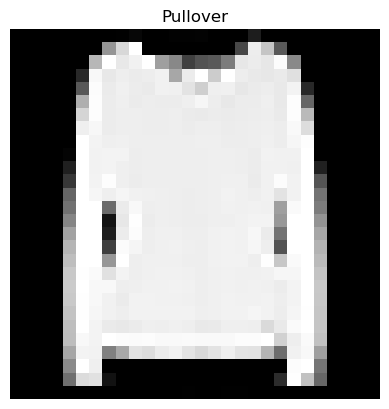

In [333]:
random_index = torch.randint(0, len(train_features_batch), size = [1]).item()
image, label = train_features_batch[random_index], train_labels_batch[random_index]
plt.imshow(image.squeeze(), cmap = "grey")
plt.title(class_names[label])
plt.axis(False)

In [334]:
print(image.shape)

torch.Size([1, 28, 28])


In [335]:
# Now we are going to pass this sample image through our model as sample and check if there are any shape mismatches

In [336]:
modelV2(image.unsqueeze(0).to(device))

torch.Size([1, 15, 14, 14])
torch.Size([1, 15, 7, 7])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x735 and 15x10)

In [347]:
# Create a Convoluyion Neural Network


class FashionMNISTModelV3(nn.Module):

    """
    Model Architecture that replicates the TinyVGG model from CNN explainer page.
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                     out_channels = hidden_units,
                     kernel_size = 3,
                     stride = 1,
                     padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                     out_channels = hidden_units,
                     kernel_size = 3,
                     stride = 1,
                     padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                     out_channels = hidden_units,
                     kernel_size = 3,
                     stride = 1,
                     padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units*7*7,# here hidden units will be multiplied with some values
                     out_features = output_shape) 
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        #print(x.shape)
        x = self.conv_block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        return x

In [353]:
modelV3 = FashionMNISTModelV3(input_shape=1,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)

In [354]:
modelV3(image.unsqueeze(0)).to(device)

tensor([[ 0.0298, -0.0024,  0.0189,  0.0375, -0.0418,  0.0161,  0.0043,  0.0173,
         -0.0217, -0.0323]], grad_fn=<AddmmBackward0>)

### 7.3 Setup Loss Function and Optimizer for Model V3

In [355]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = modelV3.parameters(),
                           lr = 0.1)

### Training and Testing Using Model_V3 using the train_step and test_step functions

In [356]:
torch.manual_seed(95)

# To calculate Runtime
from timeit import default_timer as timer
training_start_time_model3 = timer()

#Train and Test the model
epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch} -------\n")
    
    train_step(accuracy_fn= accuracy_fn,
              model = modelV3,
              data_loader = train_dataloader,
              device = device,
              loss_fn = loss_fn,
              optimizer = optimizer)

    test_step(accuracy_fn=accuracy_fn,
             model = modelV3,
             device = device,
             loss_fn = loss_fn,
             data_loader = test_dataloader)

training_end_time_model3 = timer()

total_train_time = start_end_timer_tracker(start = training_start_time_model3,
                                          end = training_end_time_model3,
                                          device = device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 0 -------

Training Loss :  0.58826  ,    Training Accuracy  :  78.87%

Testing Loss :  0.4022  ,  Testing Accuracy  :  0.34%

Epoch 1 -------

Training Loss :  0.36122  ,    Training Accuracy  :  86.92%

Testing Loss :  0.3603  ,  Testing Accuracy  :  0.36%

Epoch 2 -------

Training Loss :  0.32661  ,    Training Accuracy  :  88.32%

Testing Loss :  0.3431  ,  Testing Accuracy  :  0.34%

Epoch 3 -------

Training Loss :  0.30639  ,    Training Accuracy  :  88.89%

Testing Loss :  0.3265  ,  Testing Accuracy  :  0.35%

Epoch 4 -------

Training Loss :  0.29518  ,    Training Accuracy  :  89.27%

Testing Loss :  0.3349  ,  Testing Accuracy  :  0.34%

Train time on device : cpu is 120.4783 sec


In [357]:
# Get model_3 results
model_3_results = eval_model(
    model = modelV3,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
)

model_3_results

  0%|          | 0/250 [00:00<?, ?it/s]

{'Model Name': 'FashionMNISTModelV3',
 'Model Loss': 0.3348575532436371,
 'Model Accuracy': 88.33}

## Comparing model results and training time

In [358]:
import pandas as pd

In [359]:
compare_results = pd.DataFrame([model_3_results,
                               model_1_results,])

In [360]:
compare_results

,Model Name,Model Loss,Model Accuracy
0,FashionMNISTModelV3,0.334858,88.33
1,FashionMnistModel_0,0.448815,84.18


In [361]:
# Add training time to the compare_results
# compare_results["traning time"] = [total_train_time]

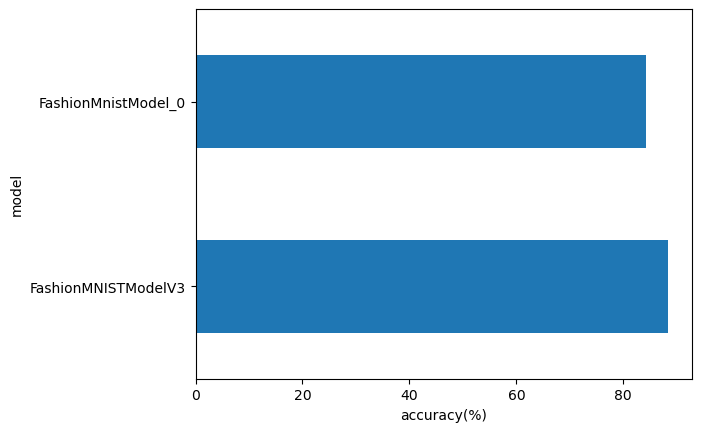

In [363]:
# Visualize the model results
compare_results.set_index("Model Name")["Model Accuracy"].plot(kind = "barh")
plt.xlabel("accuracy(%)")
plt.ylabel("model");

### Make Random Predictions with best Model

In [367]:
def make_predictions(model: torch.nn.Module,
                    data: list,
                    device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():

        for sample in data:

            # we have to add one more dimension for batch size
            sample = torch.unsqueeze(sample, dim = 0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # Get prediction probability
            pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)

            # Get pred probs on the cpu for further calculation
            pred_probs.append(pred_prob.cpu()) # matplotlib does not work on GPU

        # Stacking the prediction probs in the list as tensors
        return torch.stack(pred_probs) # concatinate everything in the list as a single tensor

In [368]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [373]:
sample_test_image, sample_test_label = test_data[0][:10]

In [375]:
sample_test_image.shape, label

(torch.Size([1, 28, 28]), tensor(2))

In [397]:
import random
random.seed(4)

test_image =[]
test_label = []

for image, label in random.sample(list(test_data), k = 9):
    test_image.append(image)
    test_label.append(label)

test_image[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Dress')

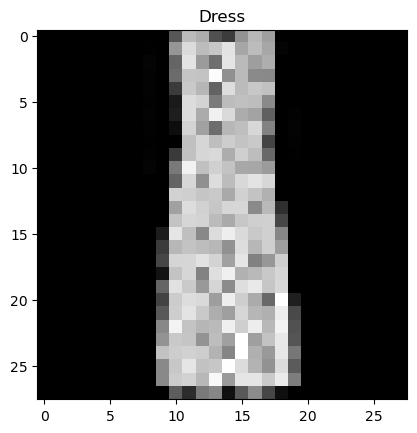

In [398]:
plt.imshow(test_image[0].squeeze(), cmap = "grey")
plt.title(class_names[test_label[0]])

In [399]:
test_image[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.3412, 0.7333, 0.6784, 0.3137, 0.2353, 0.5765,
          0.7176, 0.6235, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0039, 0.0000, 0.5882, 0.8588, 0.7373, 0.7804, 0.8941, 0.6510,
          0.7373, 0.6549, 0.0157, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0157, 0.0000, 0.3961, 0.8902, 0.6078, 0.4353, 0.8980, 0.7294,
          0.6196, 0.6824, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0118, 0.0000, 0.4196, 0.7725, 0.7686, 0.9882, 0.5647, 0.7294,
          0.5412, 0.5373, 0.0000, 0.0000, 0.0000, 0.0000,

### Make Predictions using Function

In [400]:
pred_probs = make_predictions(model = modelV3,
                             data = test_image)

In [401]:
pred_probs[:2]

tensor([[1.9461e-03, 1.2213e-03, 1.8812e-05, 9.9593e-01, 7.2991e-04, 1.2872e-06,
         5.2295e-05, 5.0074e-05, 5.8429e-07, 5.0446e-05],
        [1.0208e-04, 4.2146e-08, 1.1430e-06, 4.4597e-05, 1.1828e-05, 8.3877e-06,
         2.6233e-05, 7.0465e-07, 9.9980e-01, 2.7031e-07]])

In [402]:
pred_classes = pred_probs.argmax(dim =1)
pred_classes

tensor([3, 8, 5, 7, 7, 4, 3, 7, 6])

In [403]:
test_label

[3, 8, 5, 7, 7, 4, 3, 7, 4]

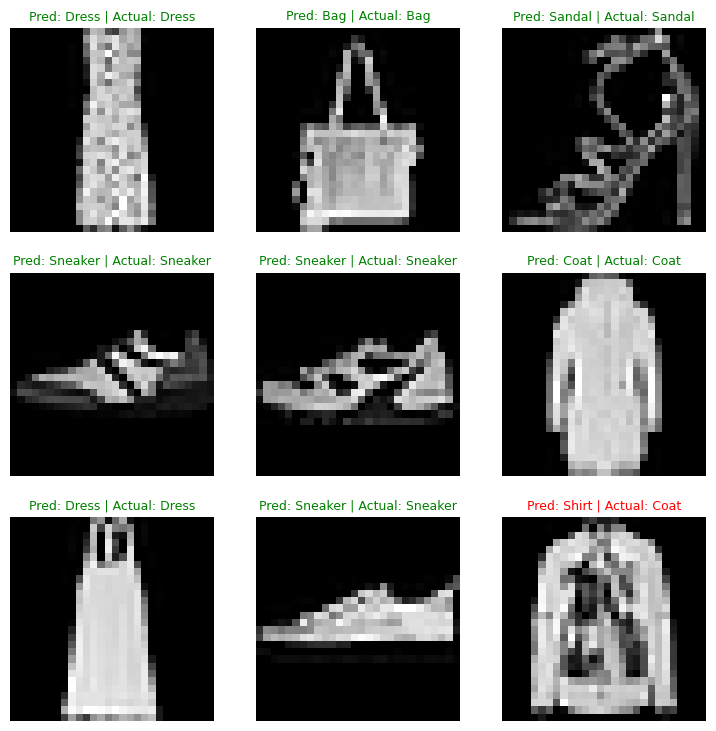

In [404]:
# Plotting Predictions
plt.figure(figsize = (9,9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_image):

    # Create Subplot
    plt.subplot(nrows, ncols, i+1)

    #plt the target Image
    plt.imshow(sample.squeeze(), cmap = "grey")

    # FInd the prediction in text form
    pred_label = class_names[pred_classes[i]]

    # FInd the truth Label
    truth_label = class_names[test_label[i]]

    # Create a title for the plt
    title_text = f"Pred: {pred_label} | Actual: {truth_label}"

    # COmpare the pred label to truth label and display in green or red depending on the prediction
    if pred_label == truth_label:
        plt.title(title_text, fontsize = 9, c = "g")
    else:
        plt.title(title_text, fontsize = 9, c = "r")

    plt.axis(False)

In [406]:
pip install tqdm==4.62.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 687.0 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
Note: you may need to restart the kernel to use updated packages.


In [409]:
# import tqdm
# tqdm.tqdm.disable = True

In [412]:
from rich.progress import Progress

# Make predictions using trained model
y_preds = []
modelV3.eval()
with Progress() as progress:
    task = progress.add_task("[green]Making Predictions ---", total=len(test_dataloader))

    with torch.inference_mode():
        for X, y in test_dataloader:
            # send the data and labels to target device
            X, y = X.to(device), y.to(device)

            # Forward pass
            y_logits = modelV3(X)

            # Converting the y_logits into y_preds
            y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)

            # put predictions on cpu for evaluation purpose as matplotlib works only on cpu
            y_preds.append(y_pred.cpu())

            # Update the progress bar
            progress.update(task, advance=1)

    # Concatinate the list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)
y_preds[:5]

Output()

[tensor([9, 8, 8, 8, 7, 8, 9, 4, 0, 4, 1, 9, 6, 2, 4, 5, 1, 2, 0, 1, 8, 9, 3, 6,
         9, 9, 3, 8, 7, 2, 1, 8, 9, 6, 7, 5, 7, 5, 9, 5]),
 tensor([9, 7, 4, 7, 9, 1, 6, 3, 4, 6, 6, 7, 4, 9, 6, 3, 0, 2, 2, 0, 0, 6, 1, 6,
         5, 7, 1, 4, 3, 2, 5, 0, 2, 8, 5, 8, 4, 3, 9, 6]),
 tensor([4, 2, 3, 1, 7, 5, 3, 8, 6, 8, 8, 8, 6, 5, 9, 3, 4, 5, 9, 4, 0, 7, 6, 6,
         8, 6, 9, 9, 9, 7, 5, 9, 9, 4, 8, 3, 1, 4, 3, 8]),
 tensor([4, 3, 1, 2, 3, 6, 1, 3, 6, 5, 8, 9, 5, 2, 8, 2, 6, 3, 6, 7, 3, 2, 6, 6,
         3, 1, 9, 0, 8, 5, 4, 4, 5, 0, 4, 0, 9, 4, 9, 7]),
 tensor([7, 7, 2, 8, 8, 1, 4, 1, 6, 8, 7, 7, 2, 7, 6, 3, 3, 4, 2, 2, 0, 6, 5, 9,
         8, 8, 1, 4, 9, 4, 7, 5, 3, 3, 3, 8, 7, 0, 6, 0])]

In [414]:
len(y_pred_tensor)

10000

In [417]:
import torchmetrics

In [418]:
pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [419]:
import mlxtend

In [420]:
print(mlxtend.__version__)

0.23.1


In [421]:
print(torchmetrics.__version__)

1.4.1


In [422]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [425]:
# 2. Setup confusion instance and compare predictions to true targets
confusion_mat = ConfusionMatrix(num_classes= len(class_names), task = "multiclass")
confusion_mat_tensor = confusion_mat(preds = y_pred_tensor,
                                    target = test_data.targets)

In [426]:
confusion_mat_tensor

tensor([[ 98,  88,  95, 114, 107,  70, 142, 113,  94,  79],
        [ 77,  91,  96, 122, 102,  95, 109, 121,  97,  90],
        [ 76,  86,  95, 117, 105,  92, 121, 128, 101,  79],
        [ 99,  84,  97, 128,  88,  67, 130, 122, 108,  77],
        [ 73, 106,  77, 112, 112,  71, 133, 111, 116,  89],
        [ 81,  93, 103, 102, 101,  97, 117, 121,  93,  92],
        [ 85,  98, 106, 108,  97,  76, 128, 115, 100,  87],
        [ 70,  92,  81, 114, 118,  95, 135, 130,  77,  88],
        [100, 100,  91, 103, 114,  64, 111, 134,  99,  84],
        [ 78,  96,  89, 117,  91,  87, 140, 109,  93, 100]])

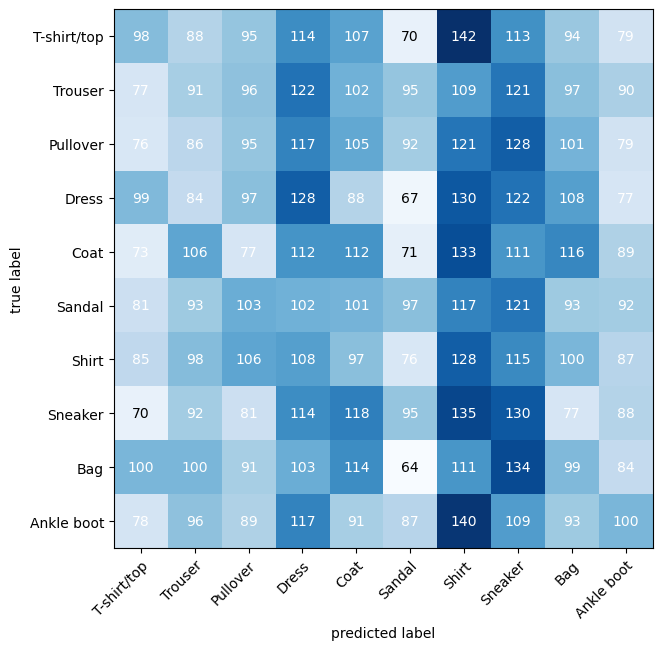

In [428]:
# plotting the confusion matrix
fig, axis = plot_confusion_matrix(confusion_mat_tensor.numpy(), class_names= class_names,
                                 figsize = (10,7))

### 11. Saving and loading the best performing model

In [429]:
from pathlib import Path

# Creating model directory
MODEL_PATH = Path("/Users/venu/Documents/Productivity/Pytorch Tutorials/Models")
MODEL_PATH.mkdir(parents= True,
                exist_ok= True)

# Create svaing of the model
MODEL_NAME = "03_Pytorch_Computer_Vision_Model_V3.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict which saves the models learned params
print(f"Saving the model to {MODEL_SAVE_PATH}")
torch.save(obj = modelV3.state_dict(),
          f = MODEL_SAVE_PATH)

Saving the model to /Users/venu/Documents/Productivity/Pytorch Tutorials/Models/03_Pytorch_Computer_Vision_Model_V3.pth


In [430]:
model_3_results

{'Model Name': 'FashionMNISTModelV3',
 'Model Loss': 0.3348575532436371,
 'Model Accuracy': 88.33}

In [432]:
# Create a new instance to load the saved model state dict

torch.manual_seed(95)

loaded_model_3 = FashionMNISTModelV3(input_shape= 1,
                                    hidden_units= 10,
                                    output_shape= len(class_names))

# Load in the state dict
loaded_model_3.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

# Save the model to the target device
loaded_model_3.to(device)

FashionMNISTModelV3(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [433]:
model_3_results

{'Model Name': 'FashionMNISTModelV3',
 'Model Loss': 0.3348575532436371,
 'Model Accuracy': 88.33}

In [434]:
# Evaluate the loaded model
torch.manual_seed(95)

loaded_model_3_results = eval_model(model = loaded_model_3,
                                   data_loader= test_dataloader,
                                   loss_fn = loss_fn,
                                   accuracy_fn= accuracy_fn)

  0%|          | 0/250 [00:00<?, ?it/s]

In [435]:
loaded_model_3_results

{'Model Name': 'FashionMNISTModelV3',
 'Model Loss': 0.33485737442970276,
 'Model Accuracy': 88.33}

In [436]:
## We can also check if the model results are close to each model
torch.isclose(torch.tensor(model_3_results["Model Loss"]),
             torch.tensor(loaded_model_3_results["Model Loss"]))

tensor(True)